In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math as mth
import pandas as pd
import numpy as np

# Notes on the genetic code.

A four letter alphabet {U,C,A,G} can generate $4^L$ different sequences of lenght $L$. For codons $L=3$ which gives 64 different codons,  which are arranged in 20 amoniacids found in proteins, plus some stop codons.

## Aminoacids.


1. Phe:= Phenylalanine
2. Leu:= Leucine
3. Ile:= Isoleucine
4. Met:= Methionine
5. Val:= Valine
6. Ser:= Serine
7. Pro:= Proline
8. Thr:= Threonine
9. Ala:= Alanine
10. Tyr:= Tyrosine
11. Stp:= Stop Codon
12. His:= Histidine
13. Gln:= Glutamine
14. Asn:= Asparagine
15. Lys:= Lysine
16. Asp:= Aspartic Acid
17. Glu:= Glutamic Acid
18. Cys:= Cysteine
19. Trp:= Tryptophan
20. Arg:= Arginine
21. Gly:= Glycine

### Genetic Code.

| |   U   |   C   |   A   |   G   | |     
|-|-------|-------|-------|-------|-|
|U|Phe UUU|Ser UCU|Tyr UAU|Cys UGU|U|
| |Phe UUC|Ser UCC|Tyr UAC|Cys UGC|C|
| |Leu UUA|Ser UCA|Stp UAA|Stp UGA|A|
| |Leu UUG|Ser UCG|Stp UAG|Trp UGG|G|
|C|Leu CUU|Pro CCU|His CAU|Arg CGU|U|
| |Leu CUC|Pro CCC|His CAC|Arg CGC|C|
| |Leu CUA|Pro CCA|Gln CAA|Arg CGA|A|
| |Leu CUG|Pro CCG|Gln CAG|Arg CGG|G|
|A|Ile AUU|Thr ACU|Asn AAU|Ser AGU|U|
| |Ile AUC|Thr ACC|Asn AAC|Ser AGC|C|
| |Ile AUA|Thr ACA|Lys AAA|Arg AGA|A|
| |Met AUG|Thr ACG|Lys AAG|Arg AGG|G|
|G|Val GUU|Ala GCU|Asp GAU|Gly GGU|U|
| |Val GUC|Ala GCC|Asp GAC|Gly GGC|C|
| |Val GUA|Ala GCA|Glu GAA|Gly GGA|A|
| |Val GUG|Ala GCG|Glu GAG|Gly GGG|G|


There is some degree of regularity in the degeneracy of the Aminoacids: 

* Trp and Met only have one codon assigned to them.
* There are three stop codons.
* Ser, Pro, Thr, Ala, Val, Gly, Leu, Arg are invariant to mutations in the third nucleotide.
* Except for $UAA \rightarrow UGA$ (Stop codons) all second position mutations change the Aminoacid.
* Mutations that do not change the aminoacid are called **SYNONYMOUS** mutations, all the other that do change the aminoacid are **NON-SYNONYMOUS**.

## The network of Aminoacids:


### Generating all the codon triplets

In [2]:
#alphabet
ab = ['A','G','U','C']
words = []
N = pow(4,3)
for i in range(0,4):
    for j in range(0,4):
        for k in range(0,4):
            codon = ab[i]+ab[j]+ab[k]
            words.append(codon)
print(N,len(words))

64 64


In [3]:
def mutations(seq,ab):
    mut = []
    n=0
    for p in seq:
        for q in ab:
            if p != q:
                mj = seq[0:n]+q+seq[n+1:]
                mut.append(mj)
        n+=1
    return mut
    
mutlist = []

for j in words:
    mutlist.append(mutations(j,ab))


In [4]:
MUTGC = pd.DataFrame(columns=words)
n=0
#MUTGC
for q in words:
    MUTGC[q]=mutlist[n]
    n+=1

In [5]:
MUTGC

AAA  AAG  AAU  AAC  AGA  AGG  AGU  AGC  AUA  AUG  ...  CGU  CGC  CUA  CUG  \
0  GAA  GAG  GAU  GAC  GGA  GGG  GGU  GGC  GUA  GUG  ...  AGU  AGC  AUA  AUG   
1  UAA  UAG  UAU  UAC  UGA  UGG  UGU  UGC  UUA  UUG  ...  GGU  GGC  GUA  GUG   
2  CAA  CAG  CAU  CAC  CGA  CGG  CGU  CGC  CUA  CUG  ...  UGU  UGC  UUA  UUG   
3  AGA  AGG  AGU  AGC  AAA  AAG  AAU  AAC  AAA  AAG  ...  CAU  CAC  CAA  CAG   
4  AUA  AUG  AUU  AUC  AUA  AUG  AUU  AUC  AGA  AGG  ...  CUU  CUC  CGA  CGG   
5  ACA  ACG  ACU  ACC  ACA  ACG  ACU  ACC  ACA  ACG  ...  CCU  CCC  CCA  CCG   
6  AAG  AAA  AAA  AAA  AGG  AGA  AGA  AGA  AUG  AUA  ...  CGA  CGA  CUG  CUA   
7  AAU  AAU  AAG  AAG  AGU  AGU  AGG  AGG  AUU  AUU  ...  CGG  CGG  CUU  CUU   
8  AAC  AAC  AAC  AAU  AGC  AGC  AGC  AGU  AUC  AUC  ...  CGC  CGU  CUC  CUC   

   CUU  CUC  CCA  CCG  CCU  CCC  
0  AUU  AUC  ACA  ACG  ACU  ACC  
1  GUU  GUC  GCA  GCG  GCU  GCC  
2  UUU  UUC  UCA  UCG  UCU  UCC  
3  CAU  CAC  CAA  CAG  CAU  CAC  
4  CGU  CGC  CGA  CGG  CGU  CGC  
5  CCU  CCC  CUA  CUG  CUU  CUC  
6  CUA  CUA  CCG  CCA  CCA  CCA  
7  CUG  CUG  CCU  CCU  CCG  CCG  
8  CUC  CUU  CCC  CCC  CCC  CCU  

[9 rows x 64 columns]

In [6]:
#Aminoacid - Codon Table.
ACC={'Phe': ['UUU', 'UUC'],
    'Leu': ['UUA','UUG','CUU','CUC','CUA','CUG'],
    'Ile': ['AUU', 'AUC', 'AUA'],
    'Met': ['AUG'],
    'Val': ['GUU', 'GUC','GUA','GUG'], 
    'Ser': ['UCU','UCC','UCA','UCG','AGU','AGC'],
    'Pro': ['CCU','CCC','CCA','CCG'], 
    'Thr': ['ACU','ACC','ACA','ACG'], 
    'Ala': ['GCU','GCC','GCA','GCG'],
    'Tyr': ['UAU','UAC'],
    'Stop':['UAA','UAG','UGA'],
    'Cys': ['UGU','UGC'],
    'Trp': ['UGG'],
    'His': ['CAU','CAC'], 
    'Gln': ['CAA','CAG'],
    'Arg': ['CGU','CGC','CGA','CGG','AGA','AGG'], 
    'Asn': ['AAU','AAC'], 
    'Lys': ['AAA','AAG'],
    'Asp': ['GAU','GAC'],
    'Glu': ['GAA','GAG'], 
    'Gly': ['GGU','GGC','GGA','GGG']}

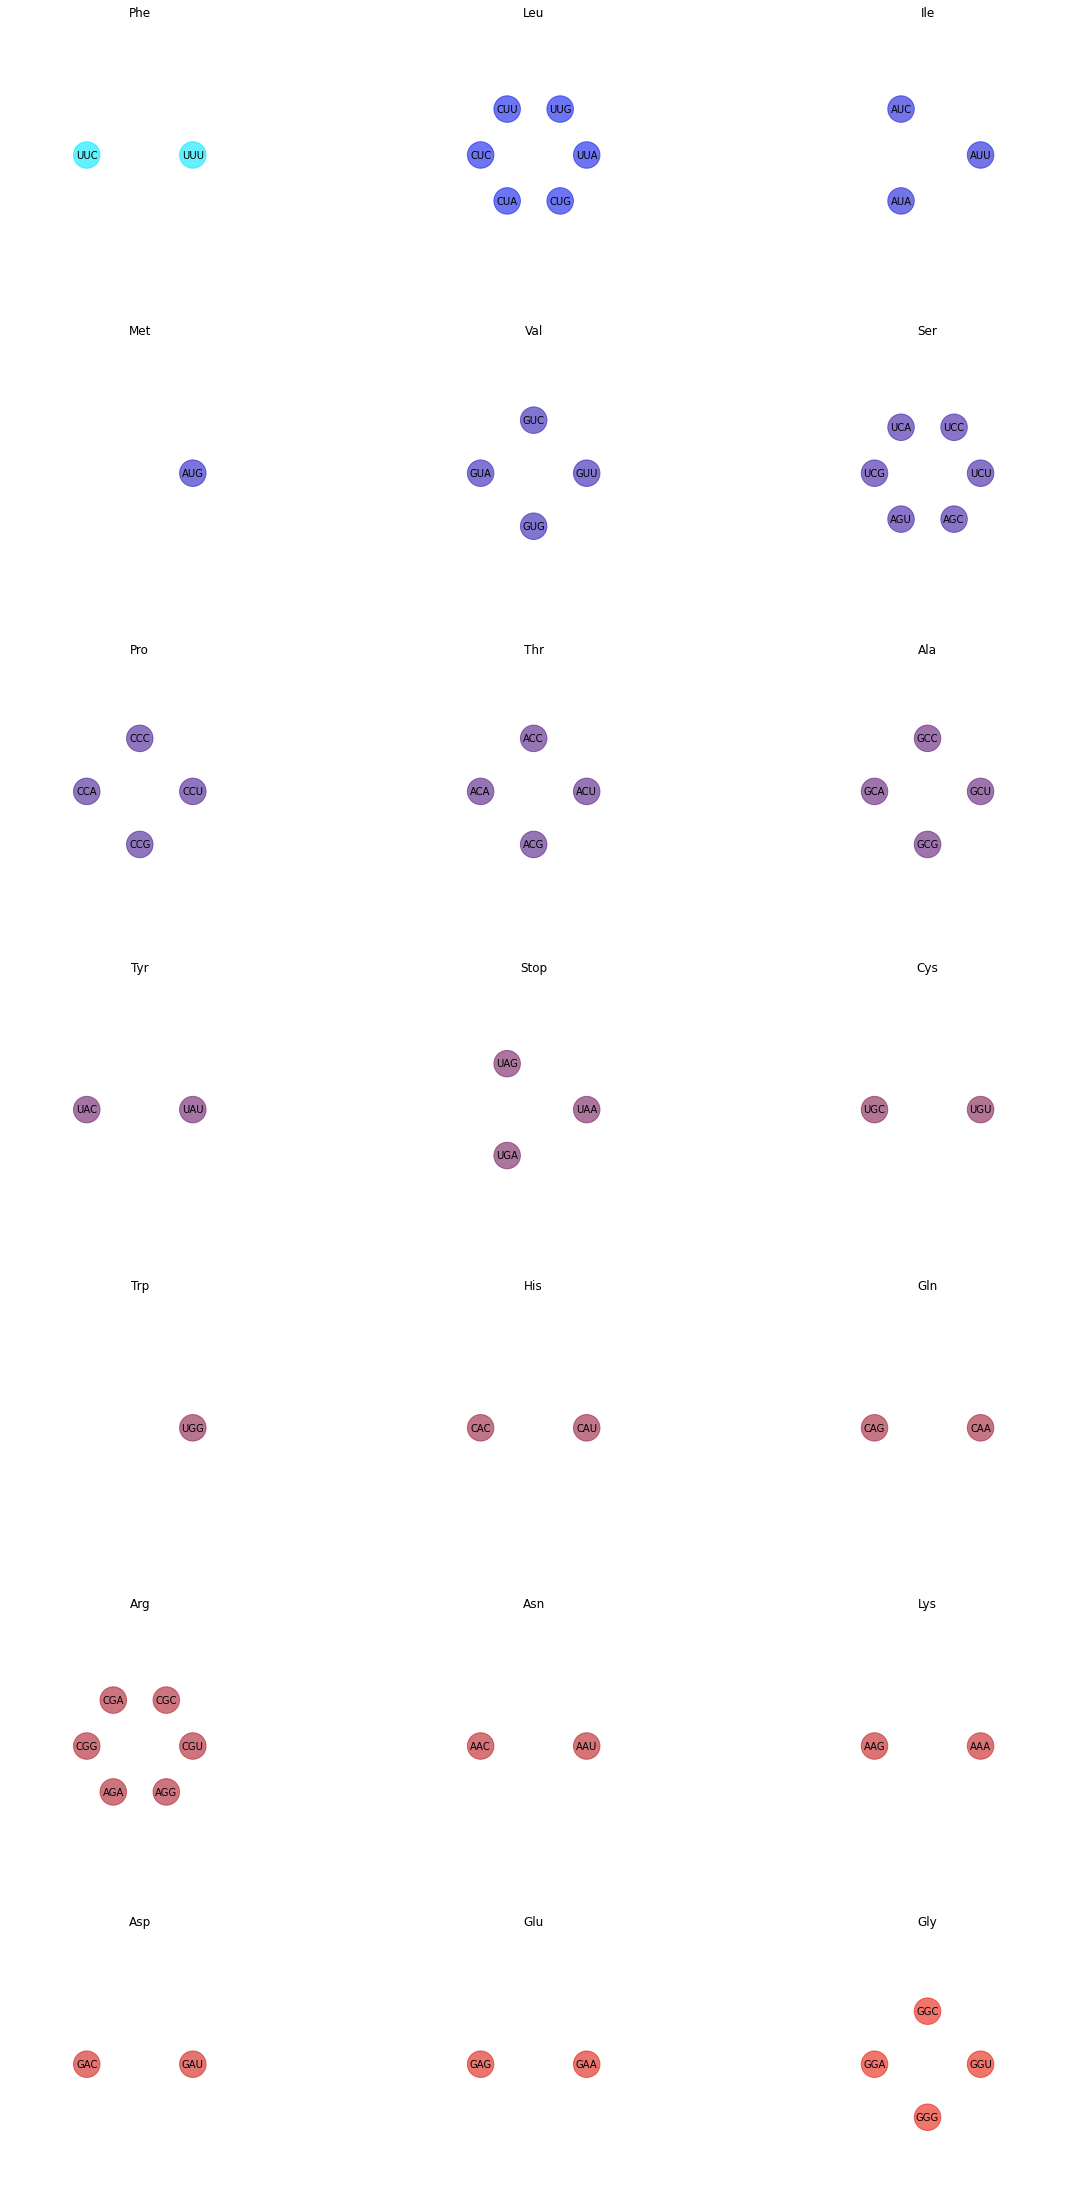

In [7]:
GCODE = pd.DataFrame(columns=['sequence','amino','x','y','color'])
AminoA = list(ACC.keys())
#print(AminoA)

fig, axes = plt.subplots(7, 3, figsize=(20, 40)) 

ro = 1.0;
m=0
seqs = [];
aminos = [];
X=[];Y=[];acolor=[];
dx = 0.04
dxo = 0.0
col = (0, 0.9,(1-dxo) )

for i in range(7):
    for j in range(3):
        amino = AminoA[m];
        nj = len(ACC[amino])
        k = 0
        circles = []
        for q in ACC[amino]:
            seqs.append(q);
            aminos.append(amino);
            theta = k*(2*mth.pi*ro/nj)
            xn = 4*ro*mth.cos(theta)
            yn = 4*ro*mth.sin(theta)
            circ = plt.Circle((xn, yn), ro ,color=col,alpha=0.6)
            X.append(xn);Y.append(yn);
            acolor.append(col)
            axes[i,j].add_patch(circ)
            axes[i,j].set_xlim([-10,10])
            axes[i,j].set_ylim([-10,10])
            axes[i,j].set_aspect('equal')
            axes[i,j].text(xn, yn, q,horizontalalignment='center', verticalalignment='center')
            axes[i,j].set_axis_off()
            axes[i,j].set_title(amino)
            k+=1
        dxo+= dx
        col=(1.13*dxo,0.1,(1-dxo)**2) 
        m+=1
GCODE['sequence'] = seqs 
GCODE['amino'] = aminos
GCODE['x'] = X
GCODE['y'] = Y
GCODE['color'] = acolor

In [8]:
GCODE

sequence amino             x             y  \
0       UUU   Phe  4.000000e+00  0.000000e+00   
1       UUC   Phe -4.000000e+00  4.898587e-16   
2       UUA   Leu  4.000000e+00  0.000000e+00   
3       UUG   Leu  2.000000e+00  3.464102e+00   
4       CUU   Leu -2.000000e+00  3.464102e+00   
..      ...   ...           ...           ...   
59      GAG   Glu -4.000000e+00  4.898587e-16   
60      GGU   Gly  4.000000e+00  0.000000e+00   
61      GGC   Gly  2.449294e-16  4.000000e+00   
62      GGA   Gly -4.000000e+00  4.898587e-16   
63      GGG   Gly -7.347881e-16 -4.000000e+00   

                                             color  
0                                    (0, 0.9, 1.0)  
1                                    (0, 0.9, 1.0)  
2                            (0.0452, 0.1, 0.9216)  
3                            (0.0452, 0.1, 0.9216)  
4                            (0.0452, 0.1, 0.9216)  
..                                             ...  
59              (0.8588, 0.1, 0.05759999999999994)  
60  (0.9040000000000001, 0.1, 0.03999999999999994)  
61  (0.9040000000000001, 0.1, 0.03999999999999994)  
62  (0.9040000000000001, 0.1, 0.03999999999999994)  
63  (0.9040000000000001, 0.1, 0.03999999999999994)  

[64 rows x 5 columns]

In [15]:
def plot_nets(case):
    fig, ax = plt.subplots(1, 1, figsize=(20, 20))
    NA  = len(AminoA); 
    
    if case not in ["full","syno"]:
        NA = NA-1
    
    R=48; ro = 1.6; lj= 1.2
    k=0
    RA = pd.DataFrame(columns=['amino','Xr','Yr'])
    RA['amino'] = AminoA
    XR = []; YR = [];
    
    for q in AminoA:
        theta = k*(2*mth.pi/NA)
        Xn=R*mth.sin(theta); Yn= R*mth.cos(theta);
        
        if case == q:
            Xn =0.0; Yn=0.0;
        
        XR.append(Xn);YR.append(Yn); 
        k+=1

    RA['Xr'] = XR; RA['Yr'] = YR;

    for q in AminoA:
        #get sequences and rel positions
        Qseq = GCODE.loc[GCODE['amino']==q]
        Ppos = RA.loc[RA['amino']==q]
    
        Xpi = list(Ppos['Xr'])[0]
        Ypi = list(Ppos['Yr'])[0]
        #get source seqs
        iseqs = list(Qseq['sequence'])
    
        for i in iseqs:
            #get mutations
            Qi = Qseq.loc[Qseq['sequence']==i]
            Xi = Xpi + list(Qi['x'])[0]
            Yi = Ypi + list(Qi['y'])[0]
            Sj=list(MUTGC[i]);
            for qj in Sj:
                Sjxy = GCODE.loc[GCODE['sequence']==qj]
                Sja = list(Sjxy['amino'])[0]
                Pjpos = RA.loc[RA['amino']==Sja]
                Xj = list(Sjxy['x'])[0] + list(Pjpos['Xr'])[0]
                Yj = list(Sjxy['y'])[0] + list(Pjpos['Yr'])[0]
                if case == 'syno':
                    if q== Sja:
                        ax.plot([Xi,Xj],[Yi,Yj],'-',color='yellow', alpha=0.15)
                if case == 'full':
                    ax.plot([Xi,Xj],[Yi,Yj],'-',color='yellow', alpha=0.15)
                
                if case == q:
                    ax.plot([Xi,Xj],[Yi,Yj],'-',color='yellow', alpha=0.15)
                    
    for q in AminoA:
        Ppos = RA.loc[RA['amino']==q]
        Xpi = list(Ppos['Xr'])[0]
        Ypi = list(Ppos['Yr'])[0]

        Qn = GCODE.loc[GCODE['amino']==q]
    
        xn = list(Qn['x']);yn = list(Qn['y']); 
        sqn = list(Qn['sequence']); coln = list(Qn['color']);
        for j in range(len(Qn['amino'])):
            circ = plt.Circle((Xpi+xn[j], Ypi+yn[j]), ro ,color=coln[j],alpha=1.0)
            ax.add_patch(circ)
            ax.text(Xpi+xn[j], Ypi+yn[j], sqn[j],horizontalalignment='center', verticalalignment='center',color='w')
    
        bbox_props = dict(boxstyle="round", ec="0.5", alpha=0.9,fc=coln[j])
        ax.text(lj*Xpi, lj*Ypi, q,horizontalalignment='center', verticalalignment='center',bbox=bbox_props,size=15,color='w')
    
    ax.set_xlim([-60,60])
    ax.set_ylim([-60,60])
    ax.set_aspect('equal')
    ax.set_axis_off()
    
    fig.savefig(case+".png", dpi=150,bbox_inches='tight')
    fig.savefig(case+".svg", dpi=150,bbox_inches='tight')

/tmp/ipykernel_197820/588015610.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(20, 20))


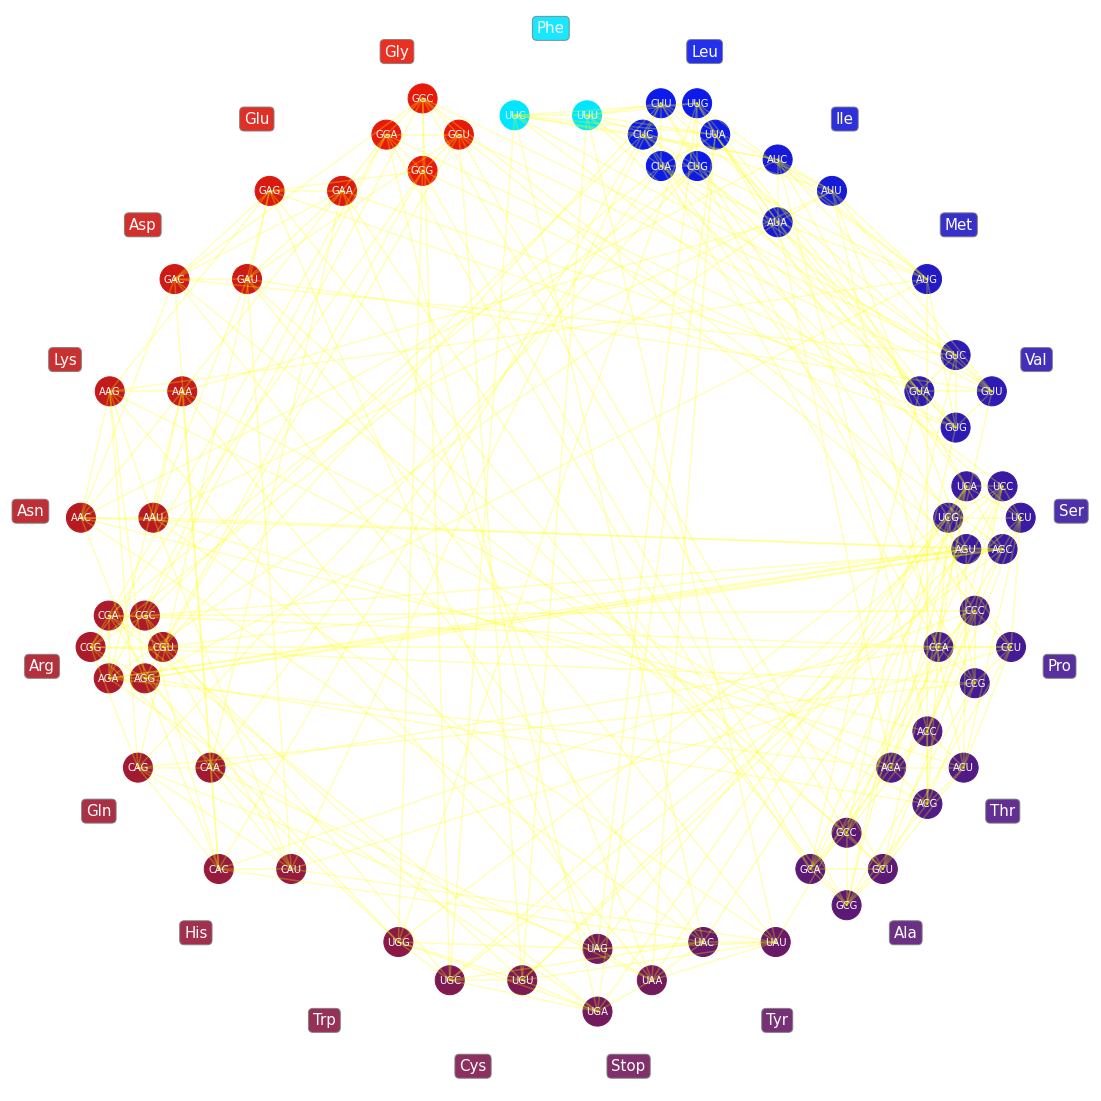

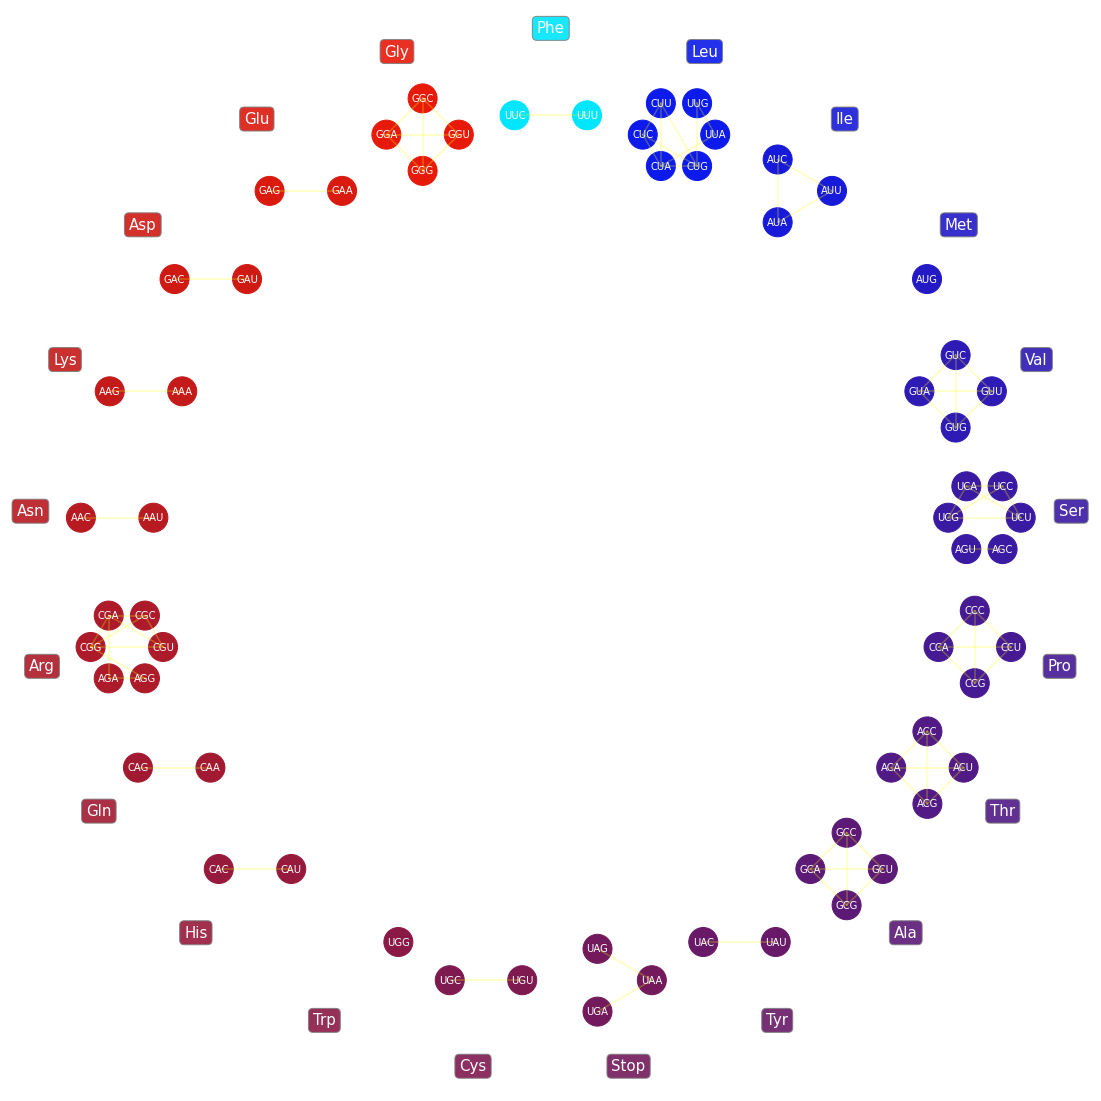

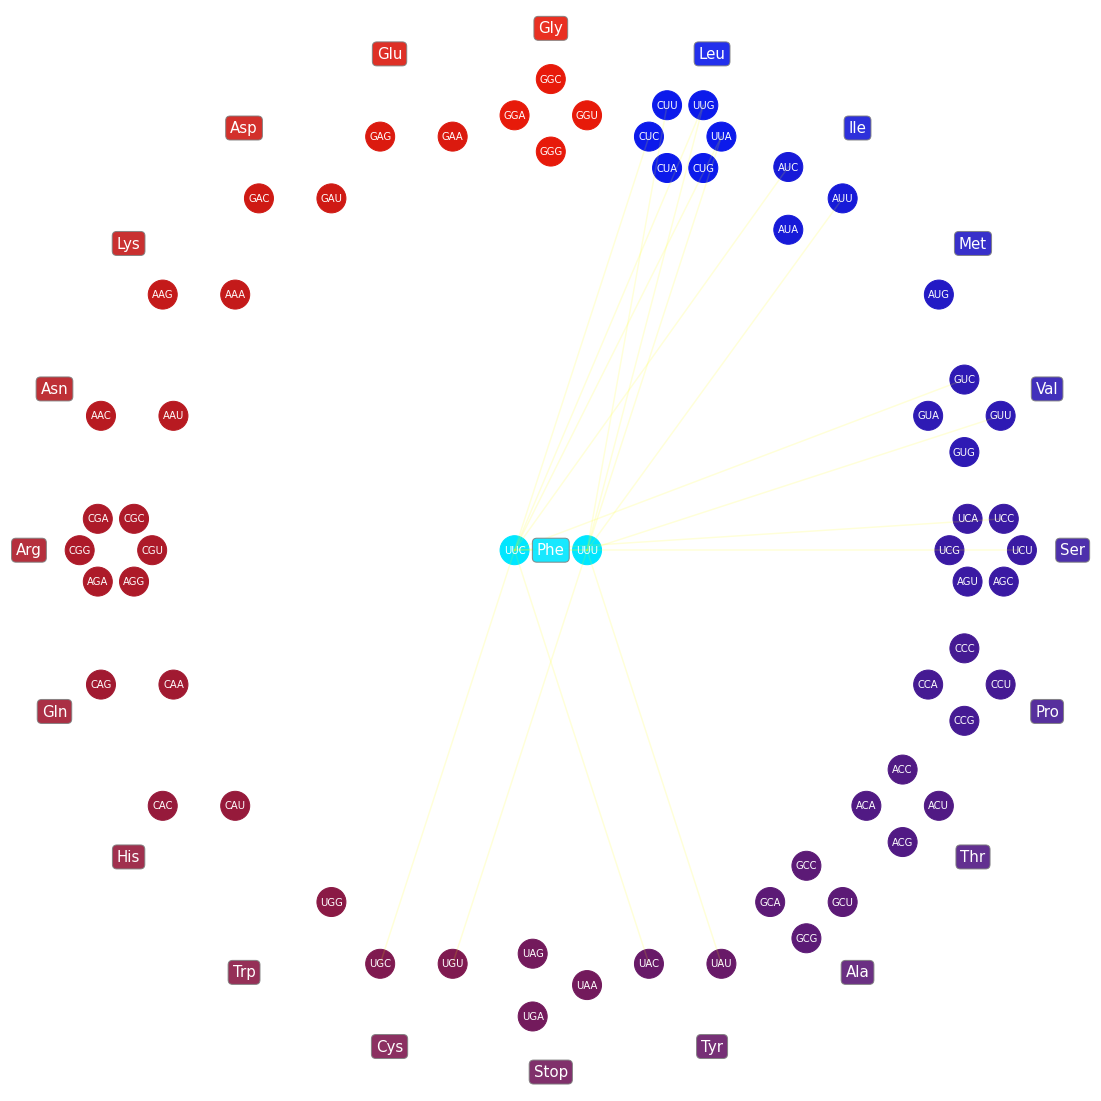

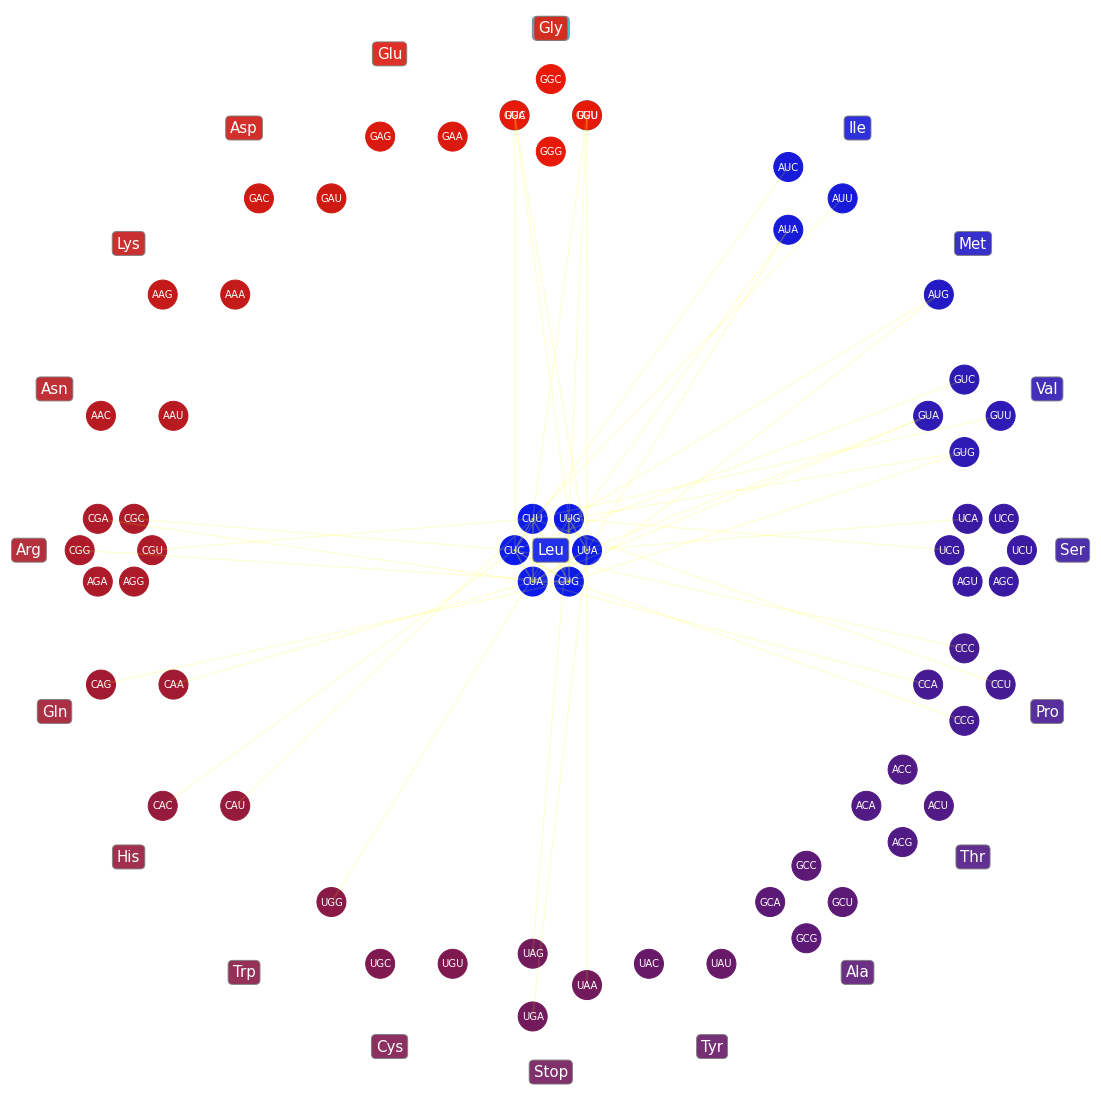

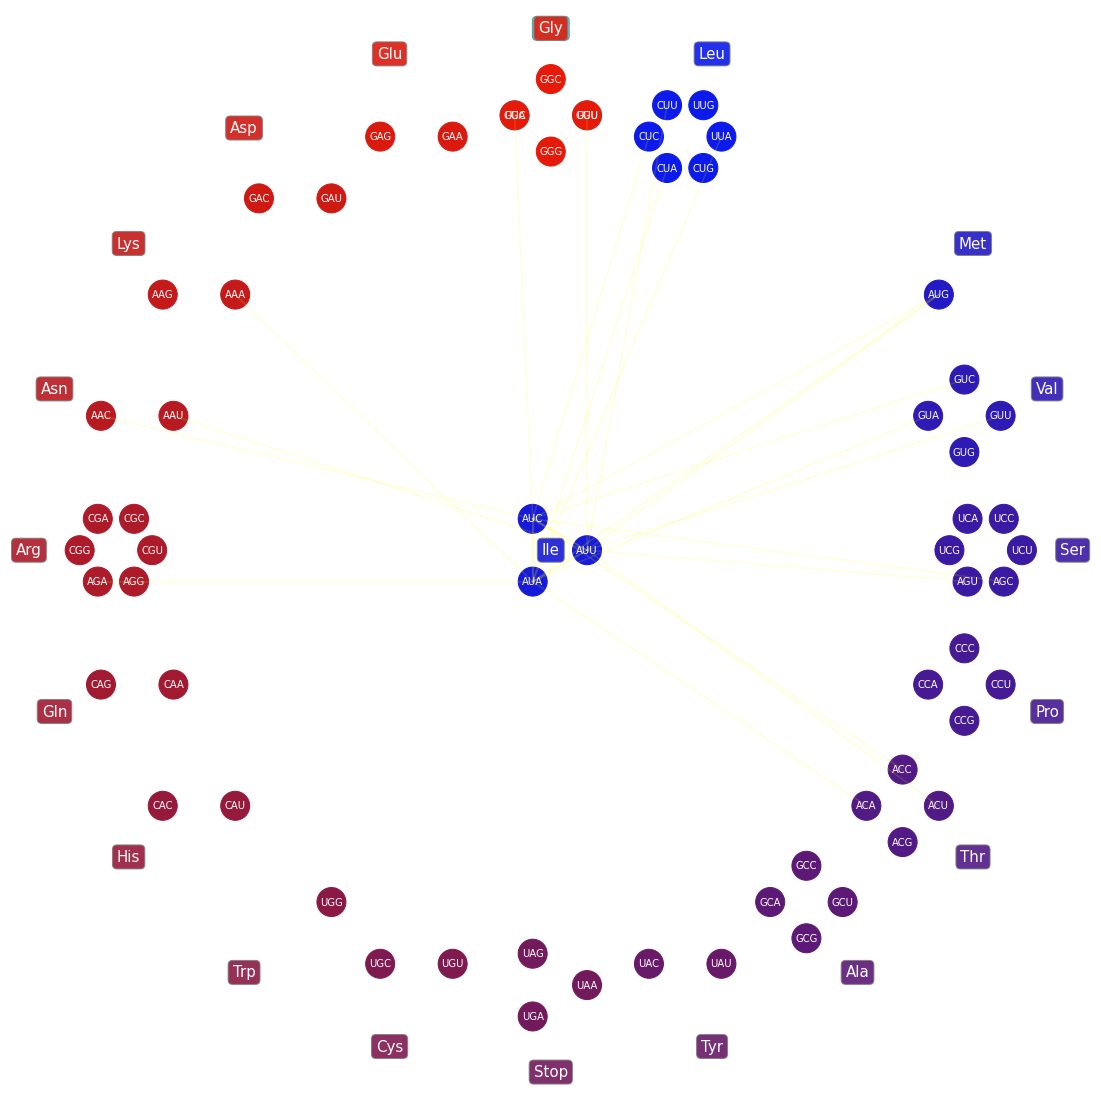

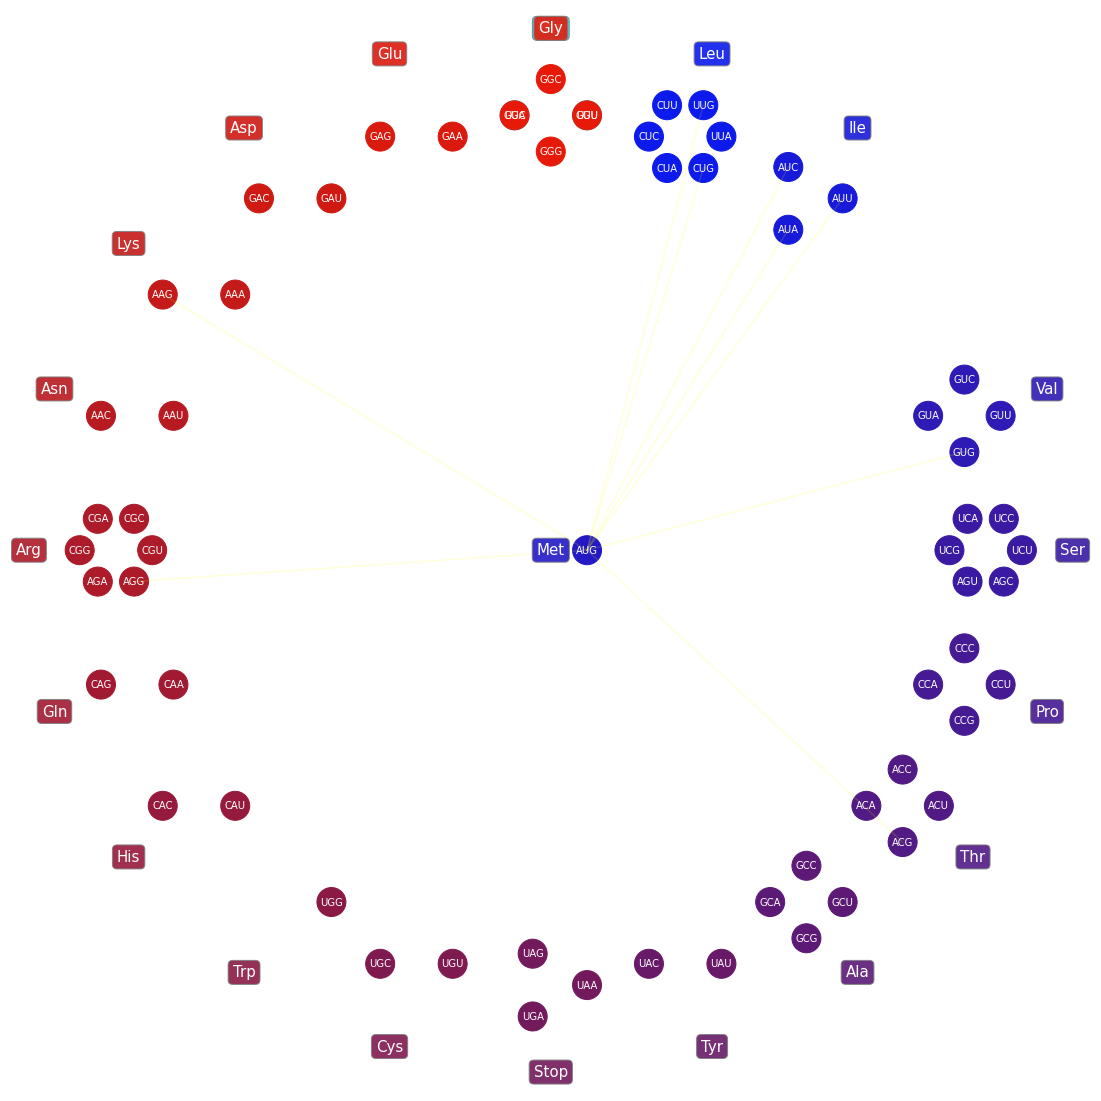

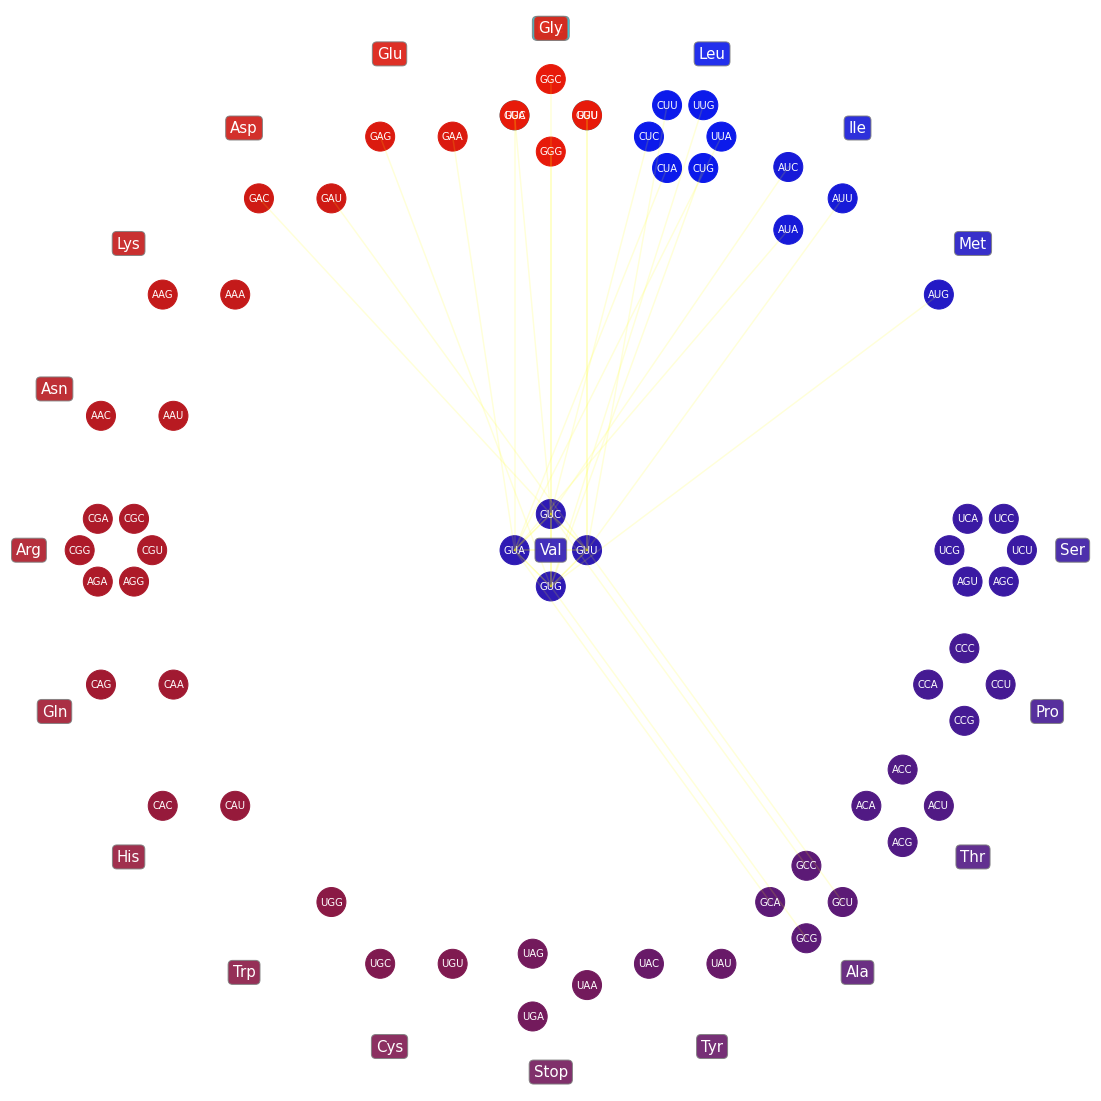

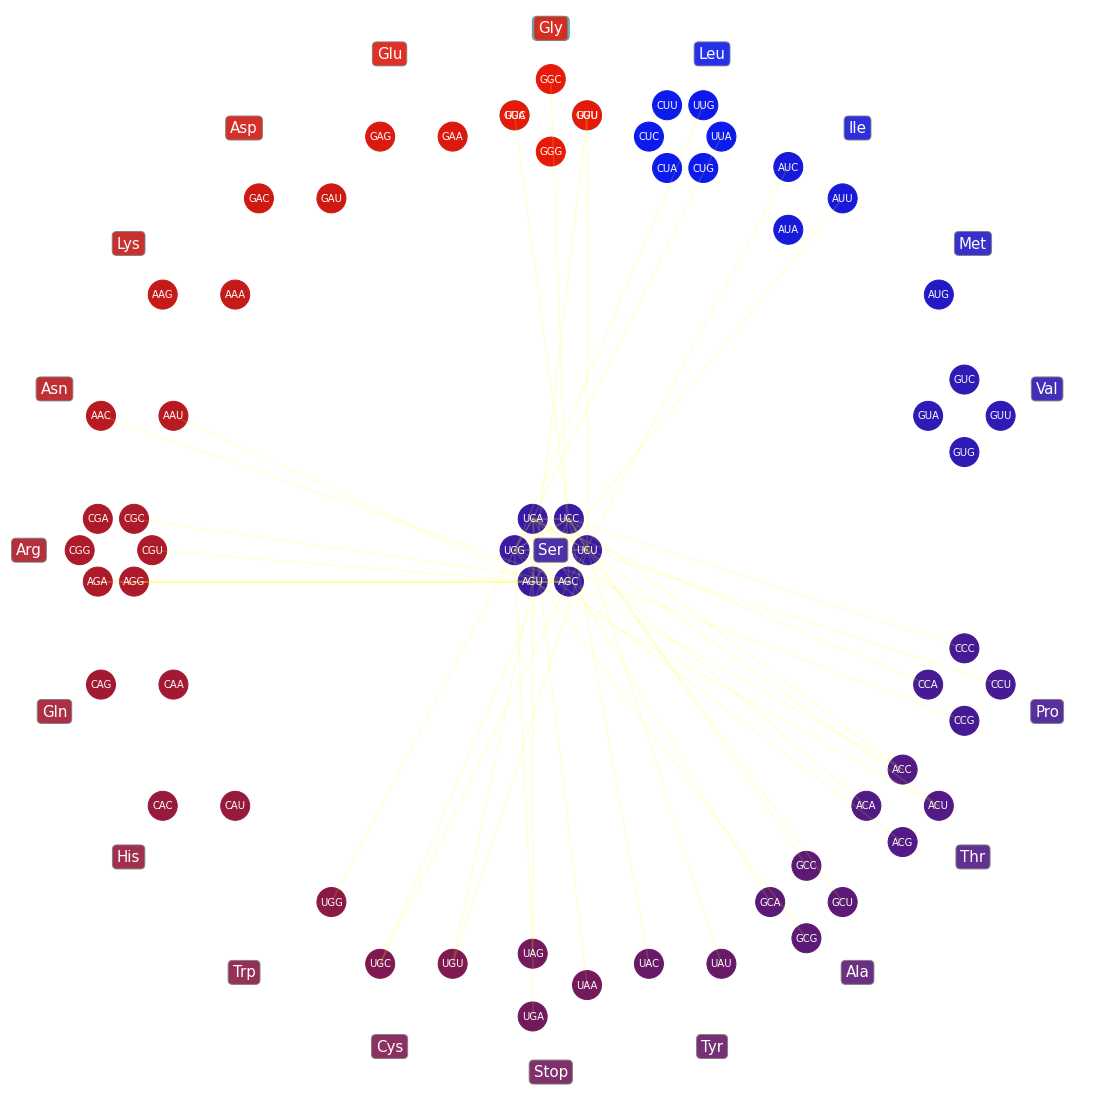

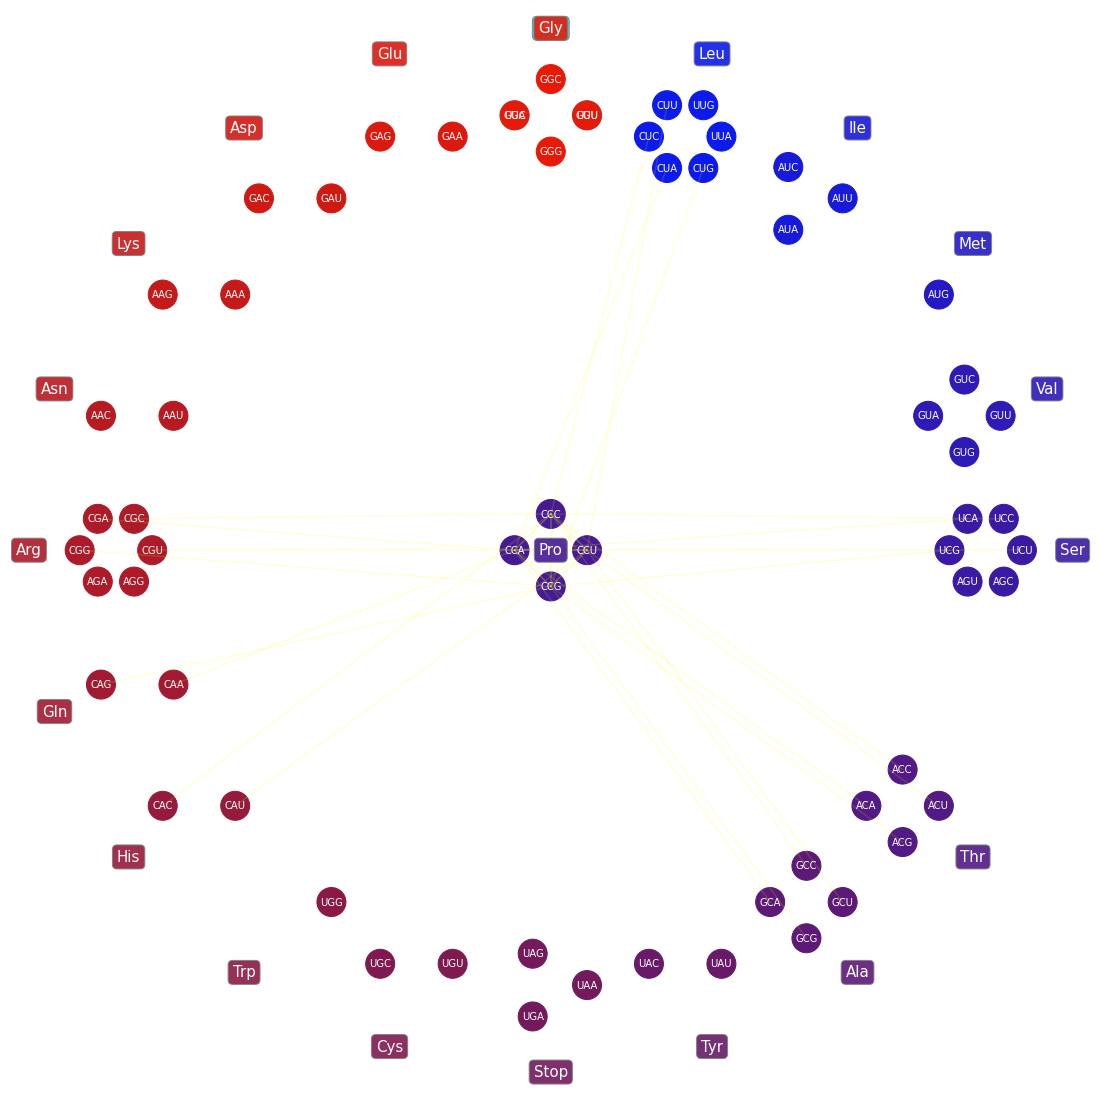

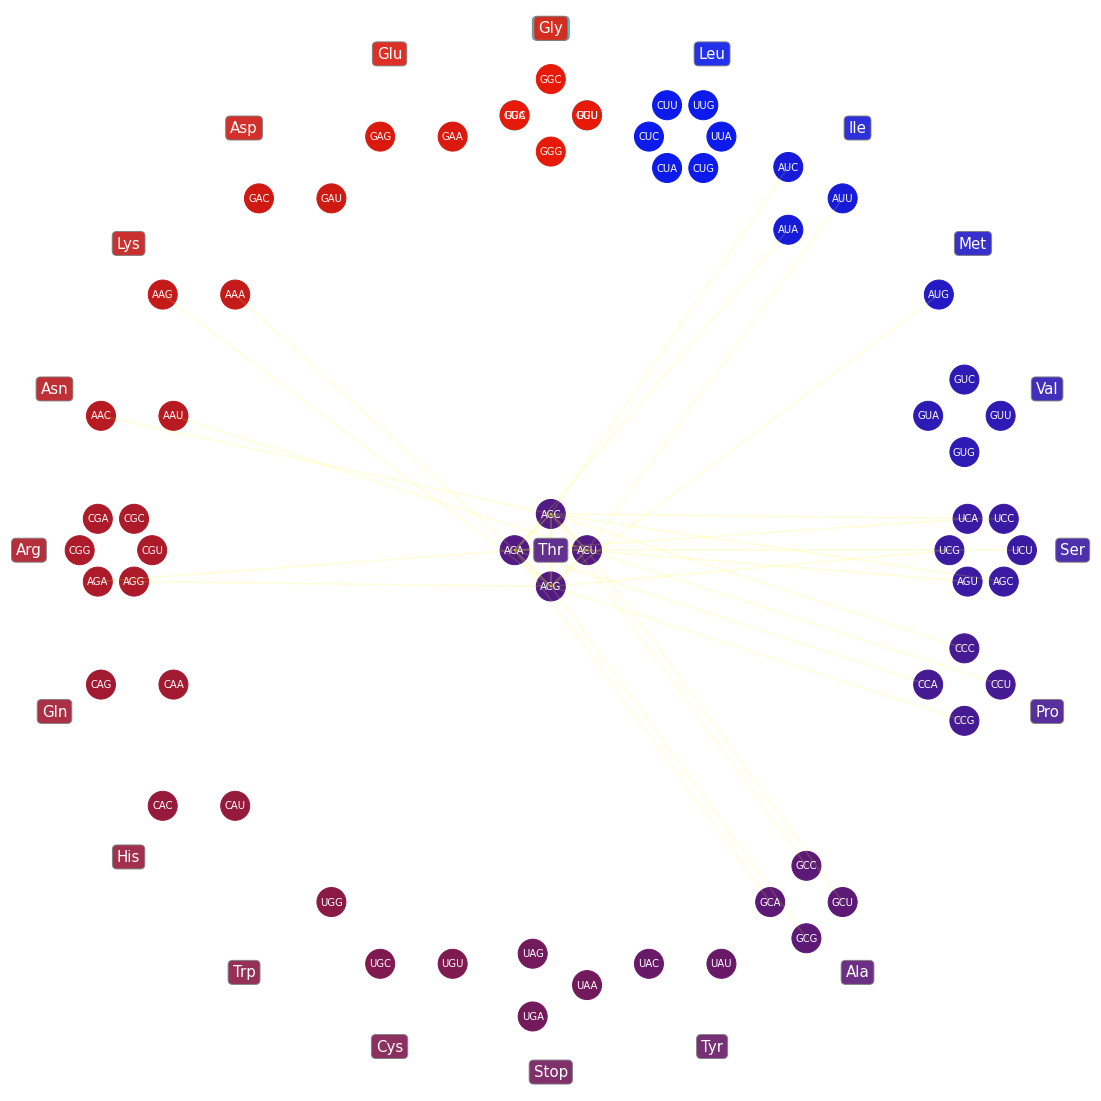

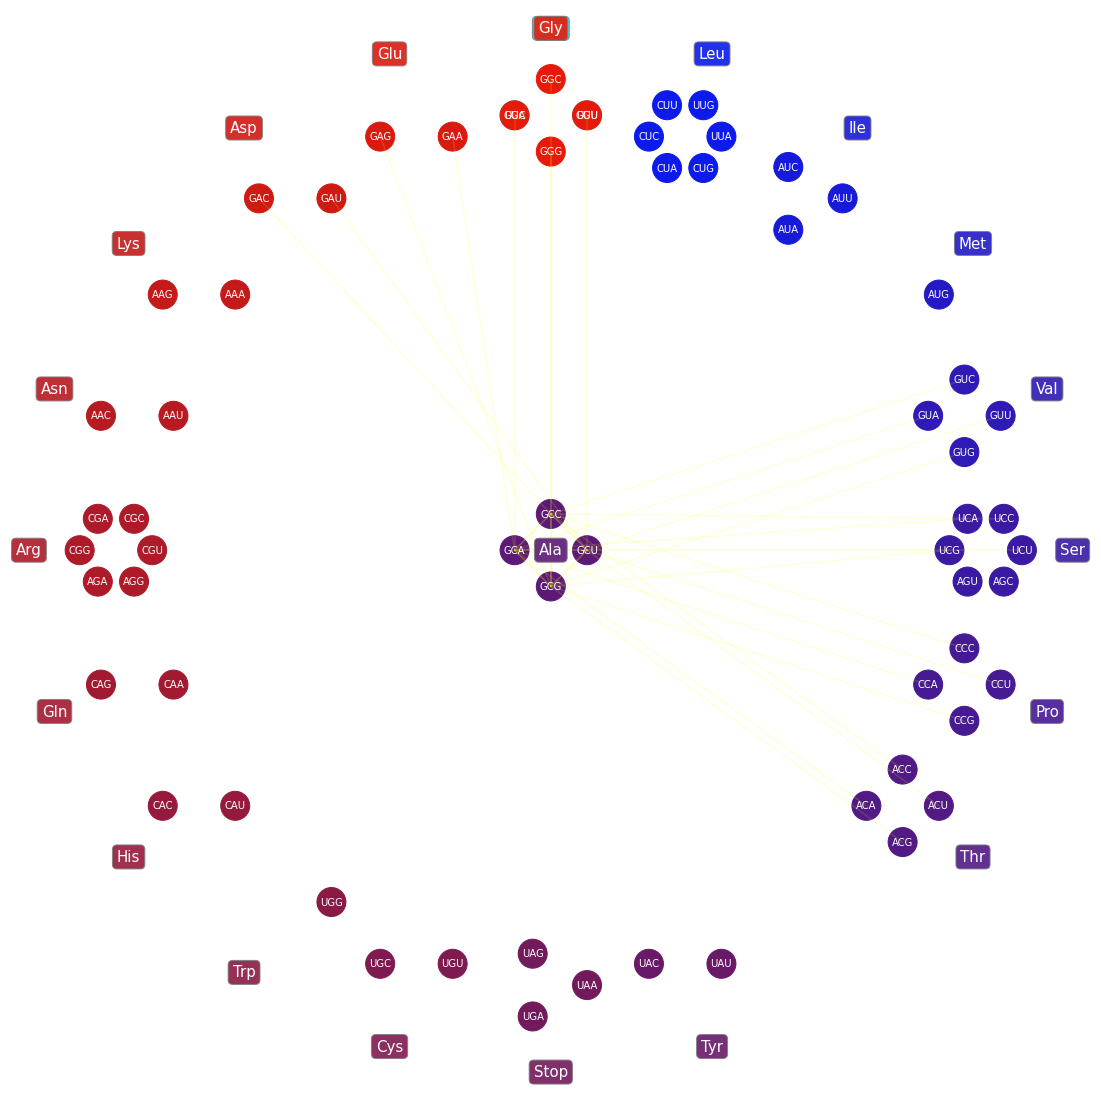

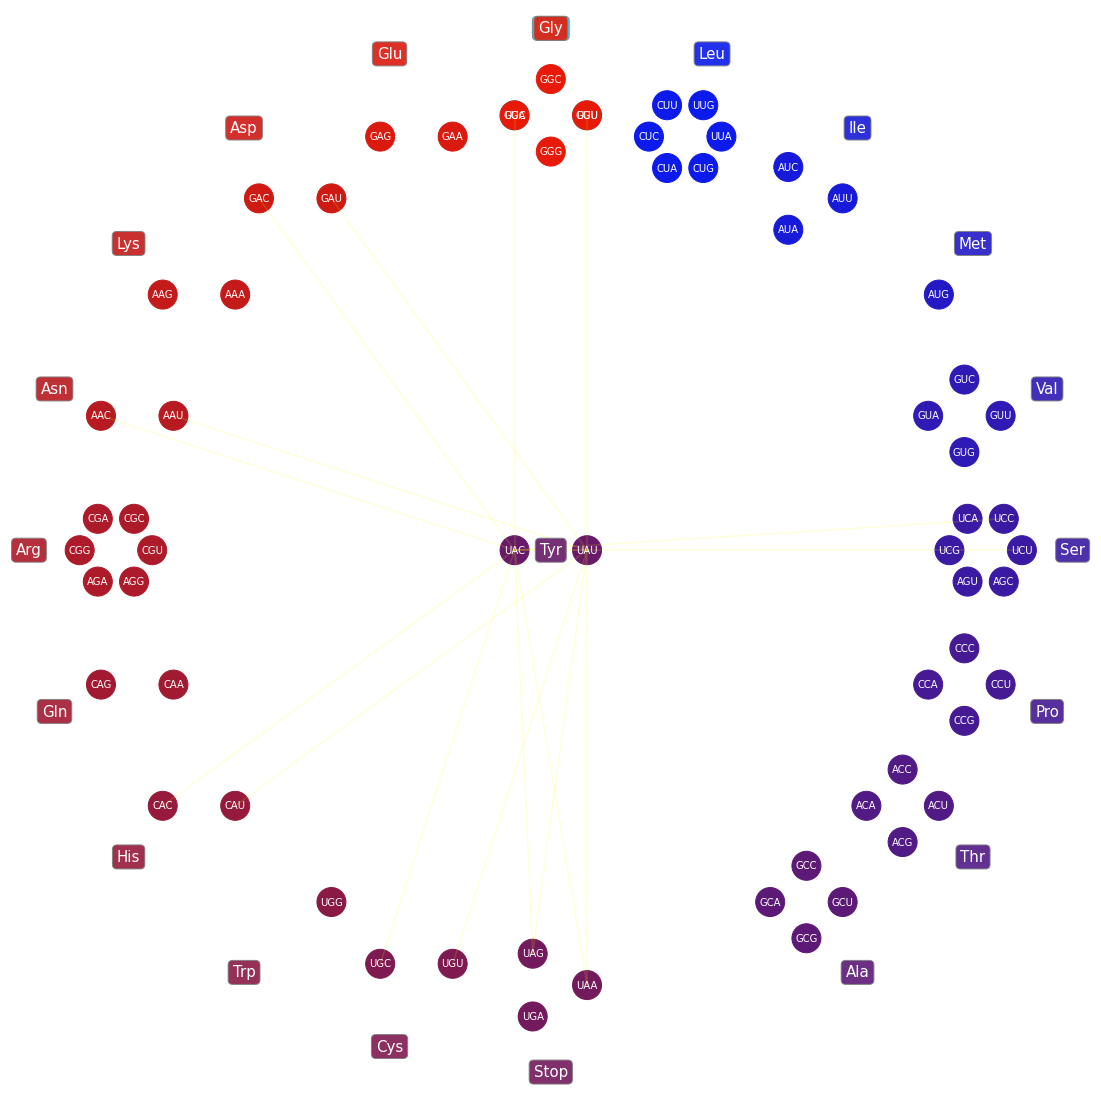

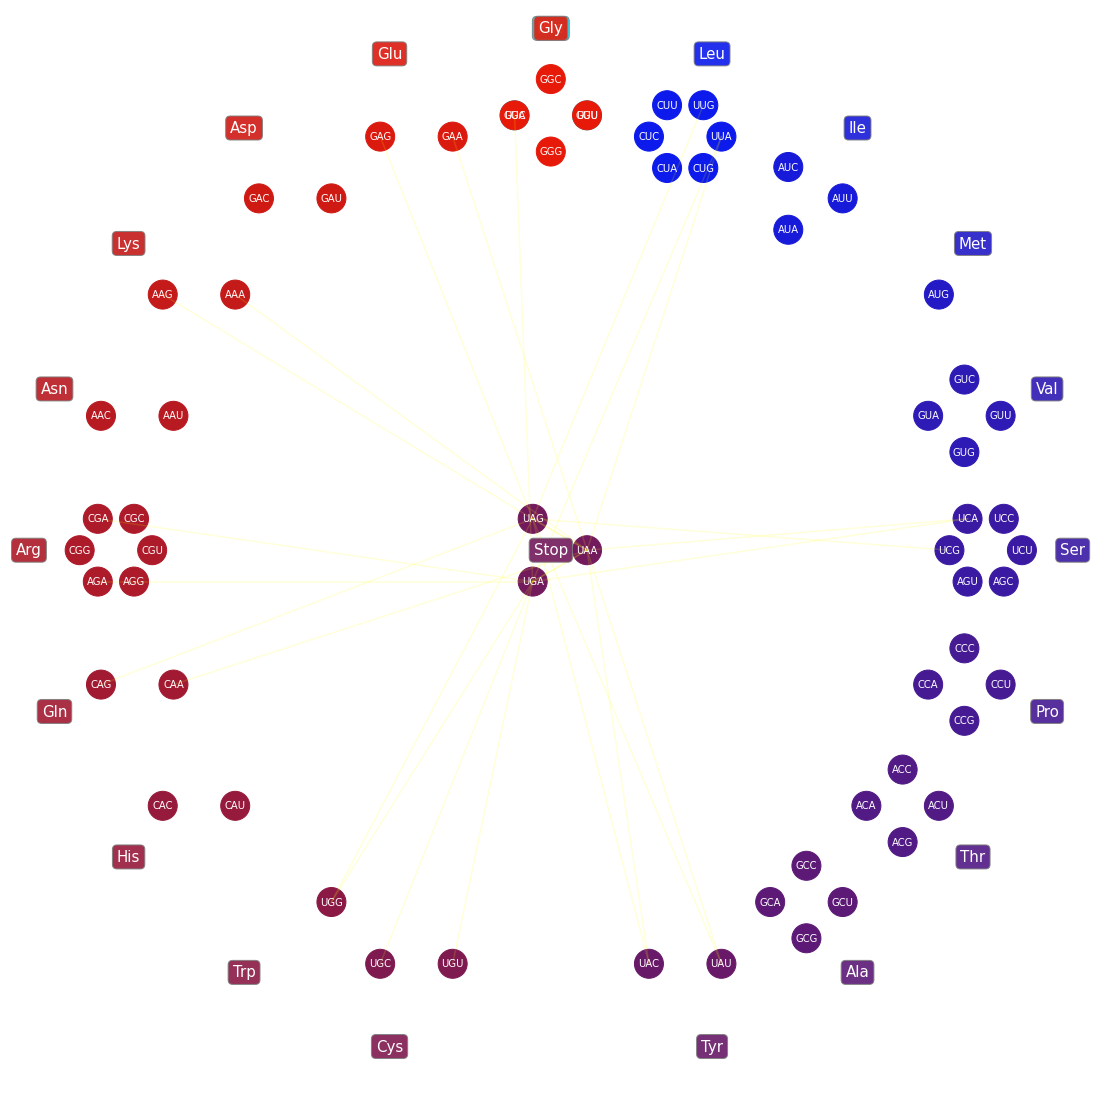

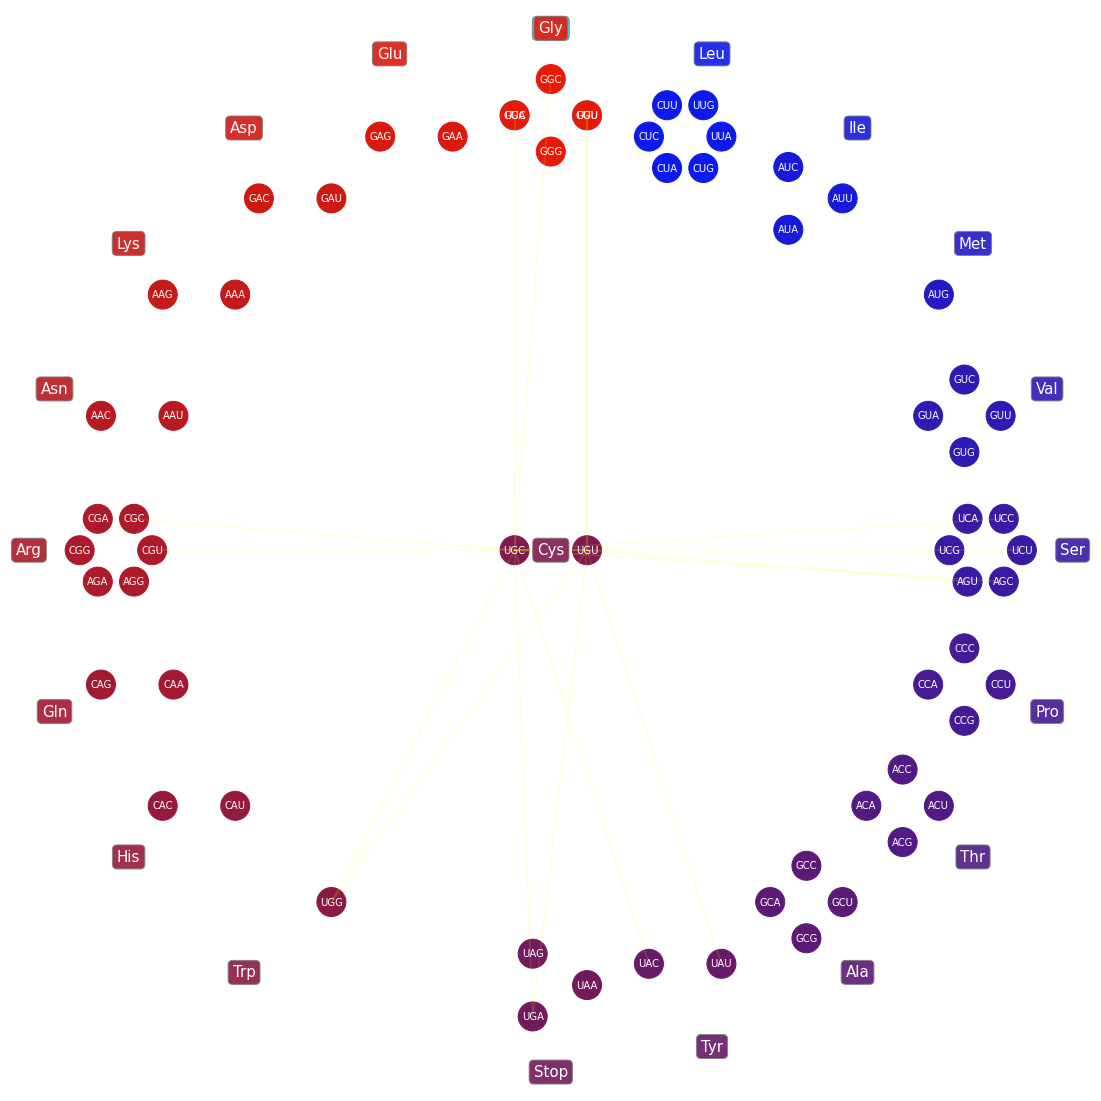

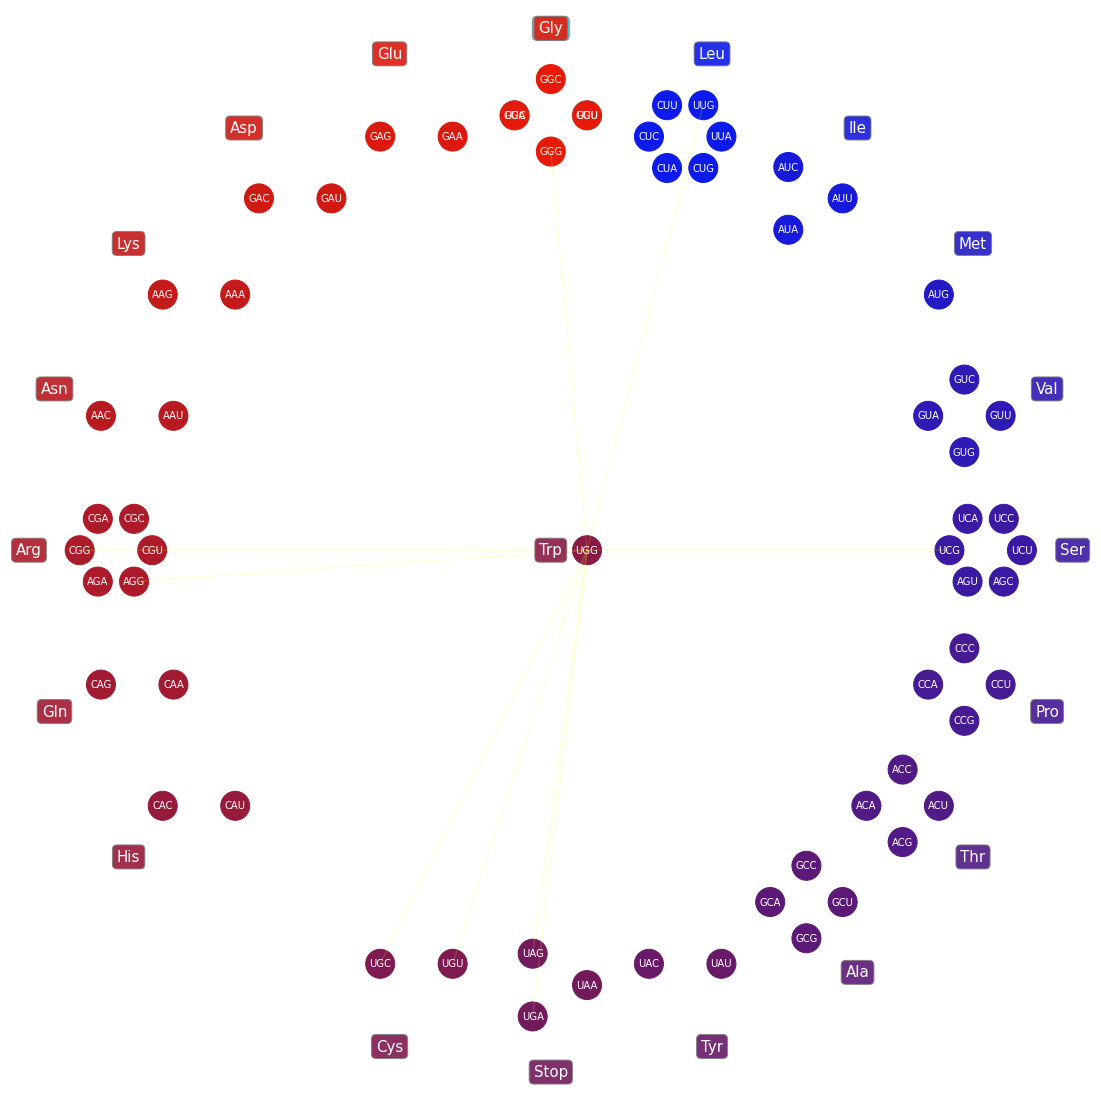

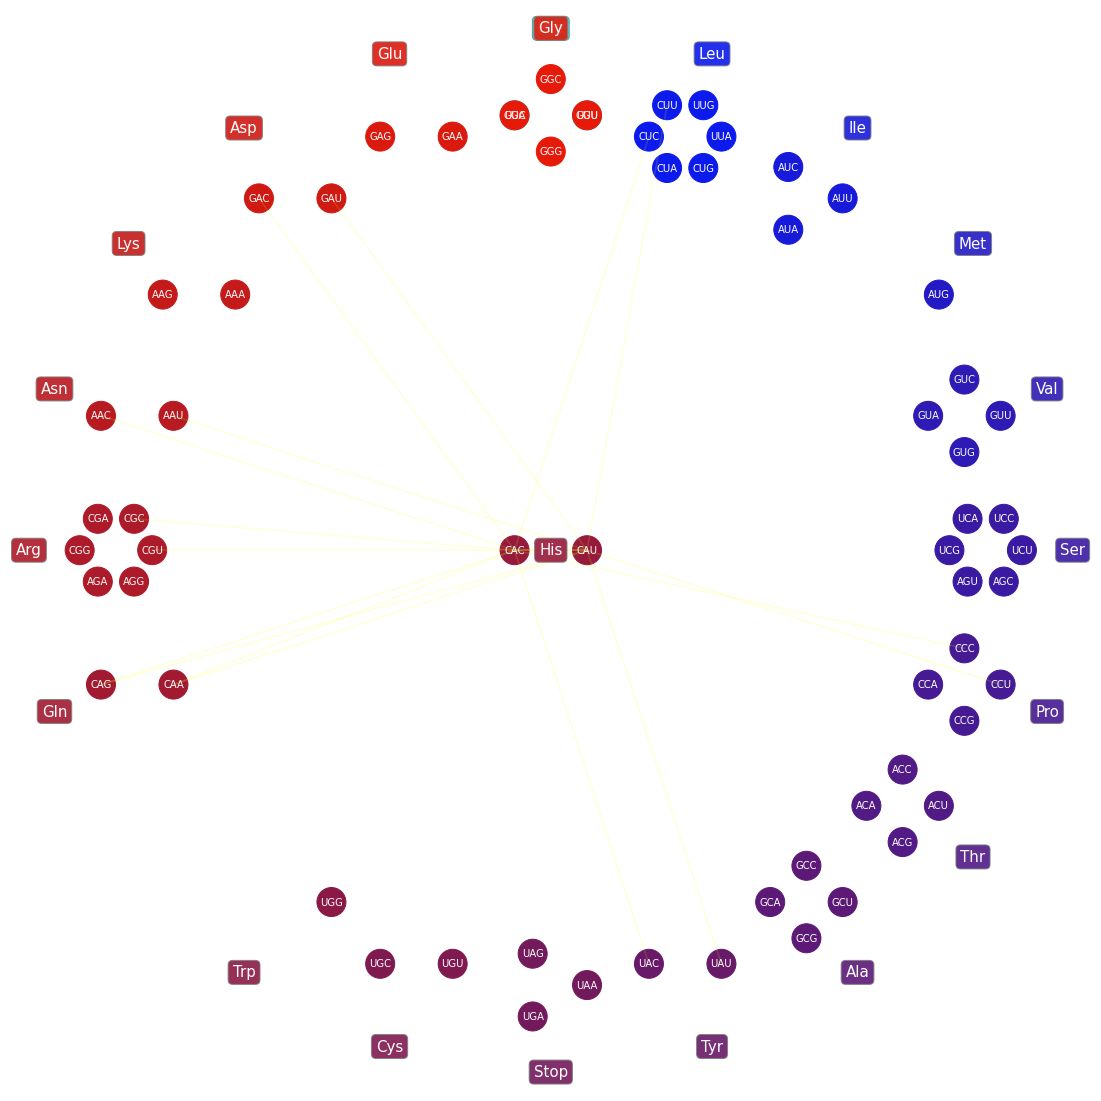

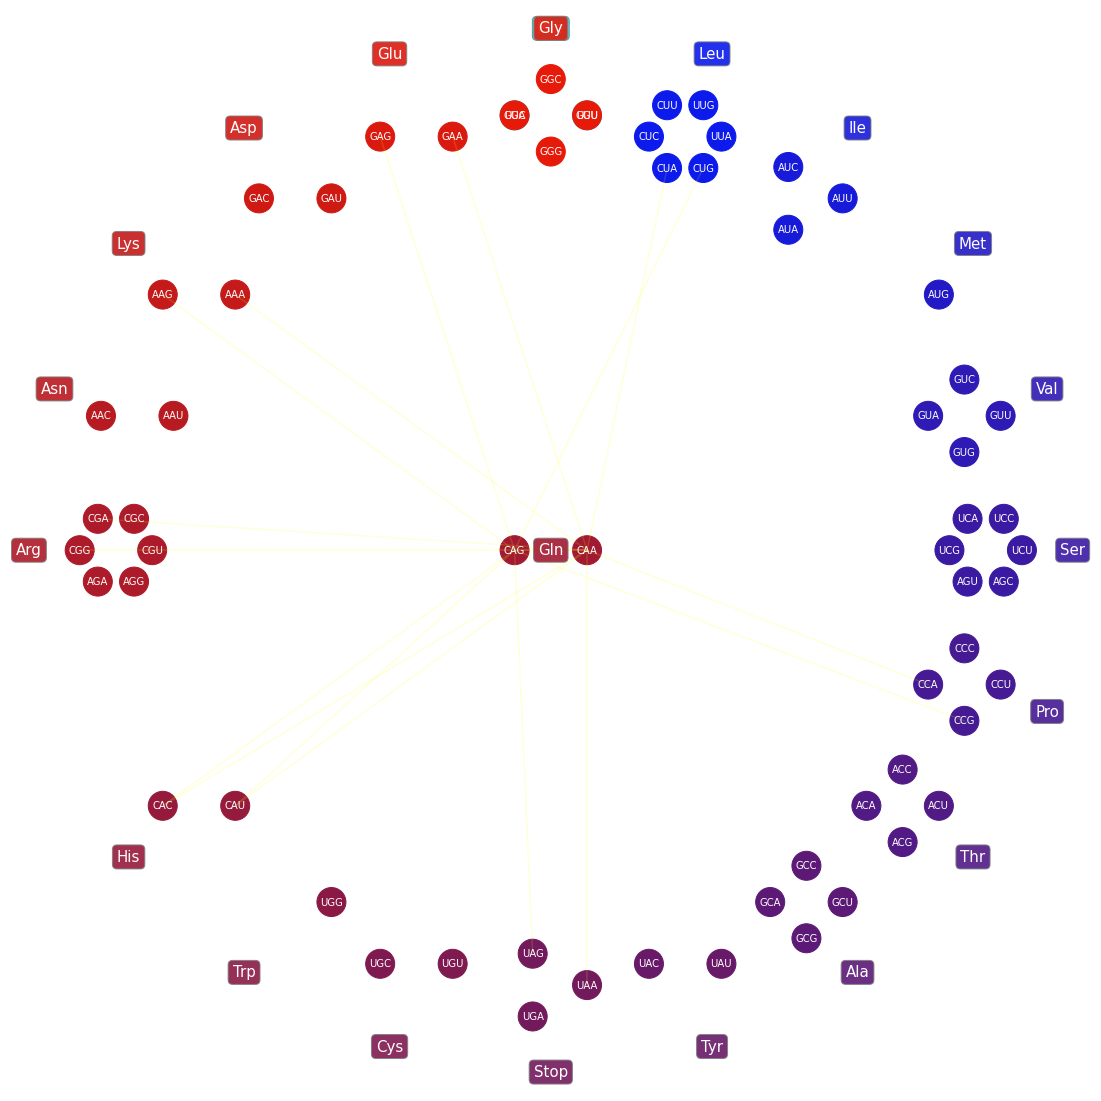

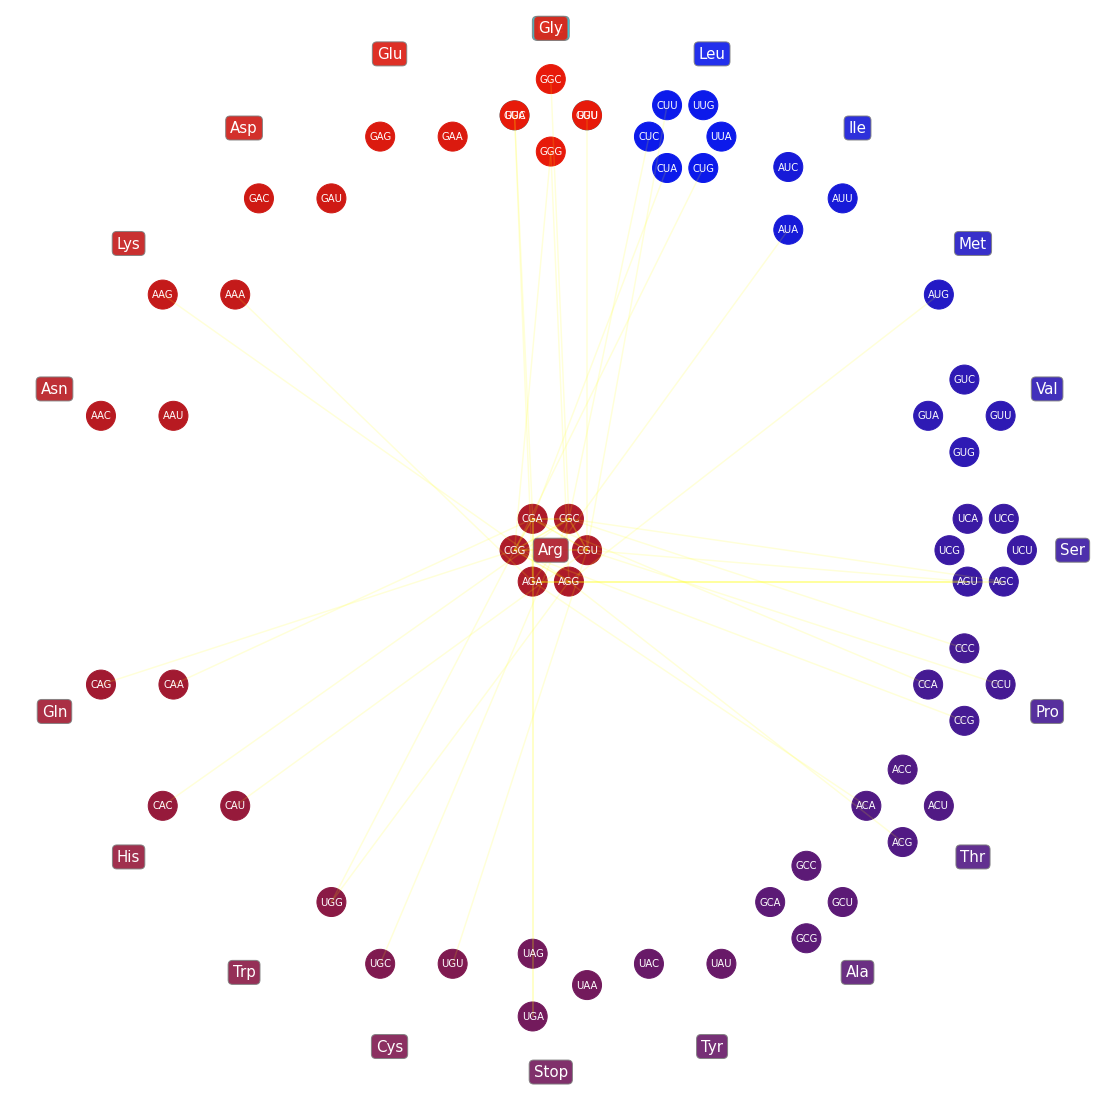

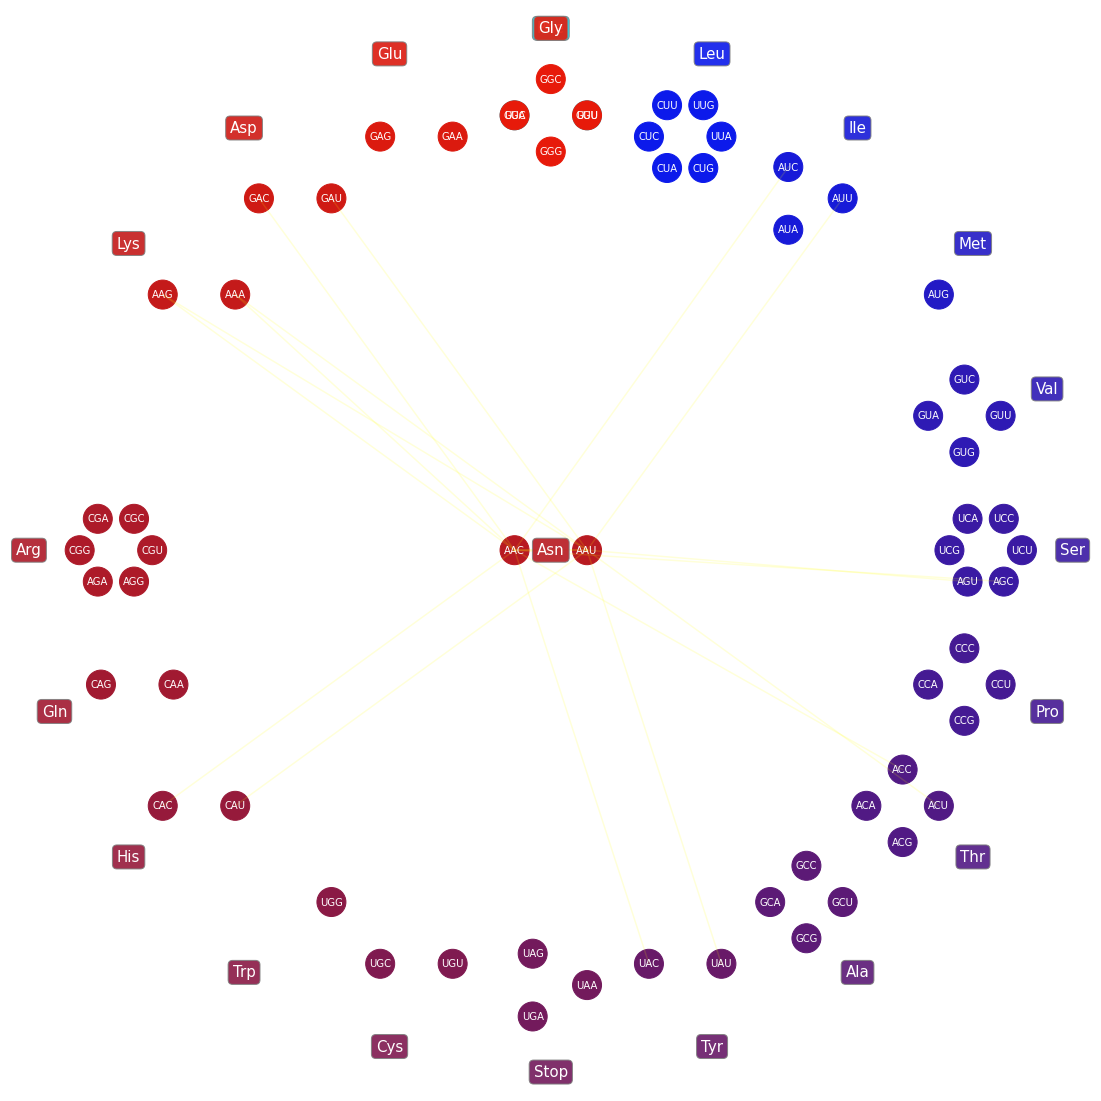

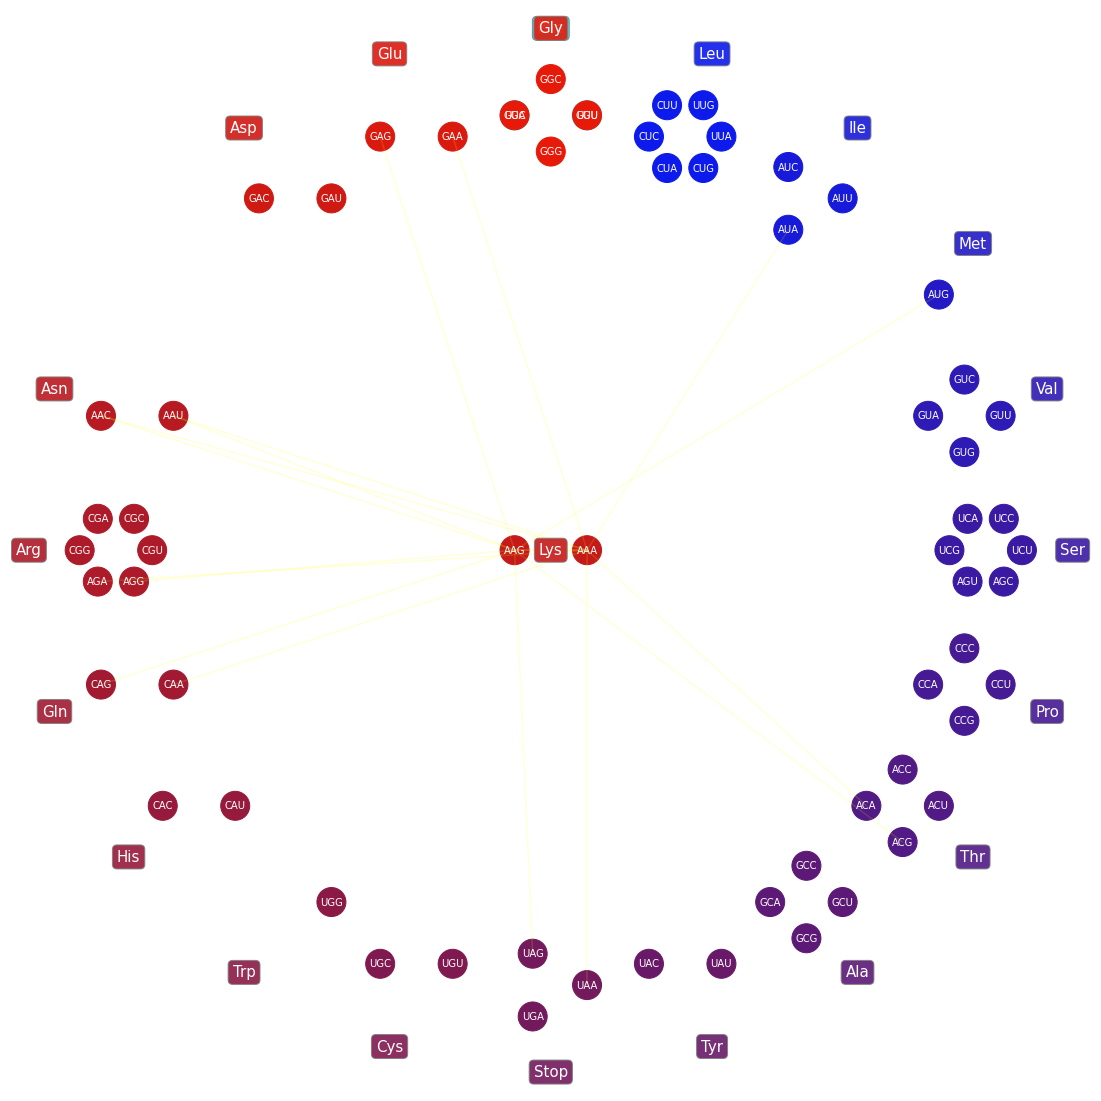

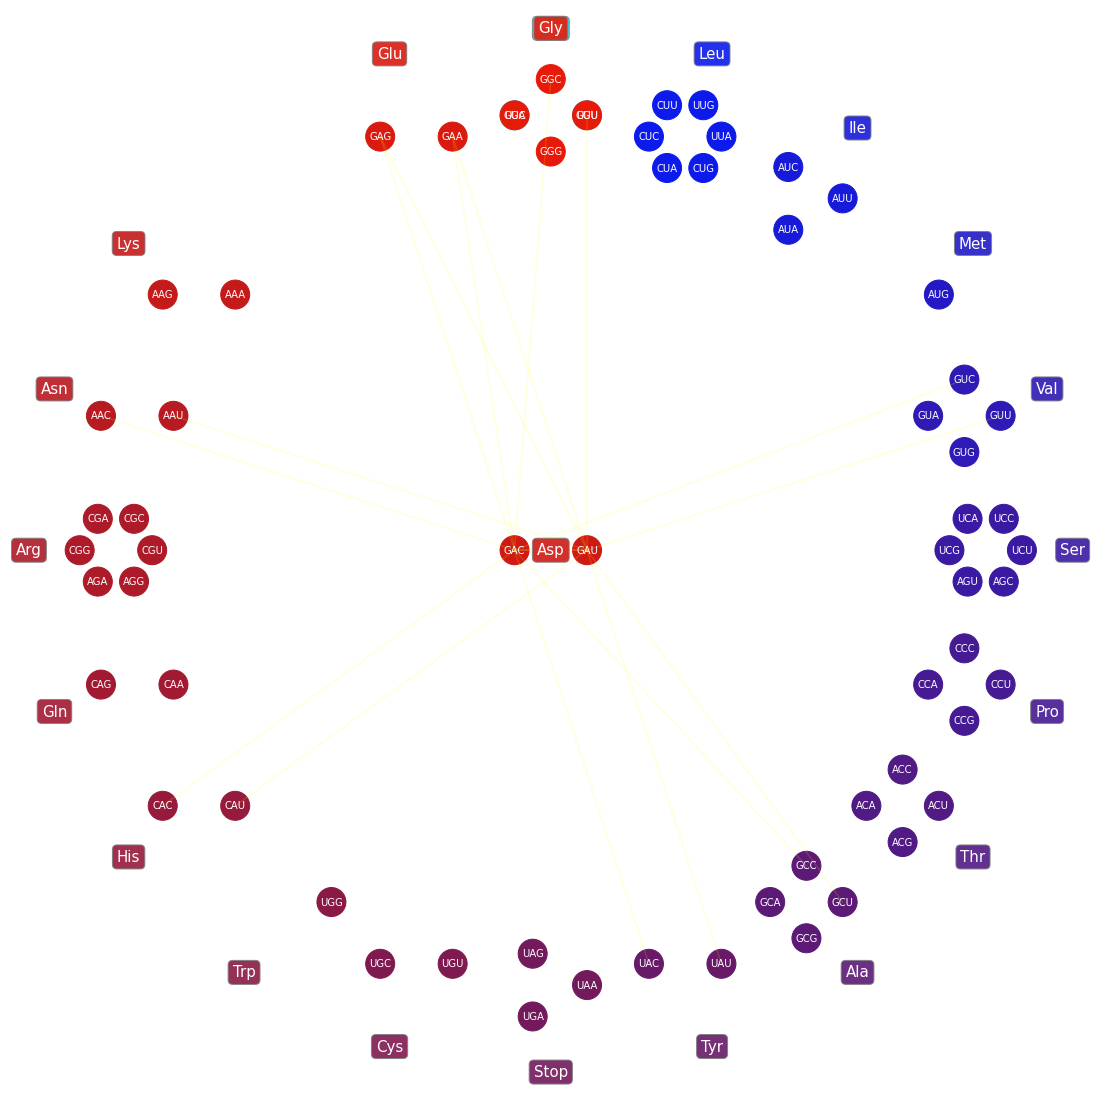

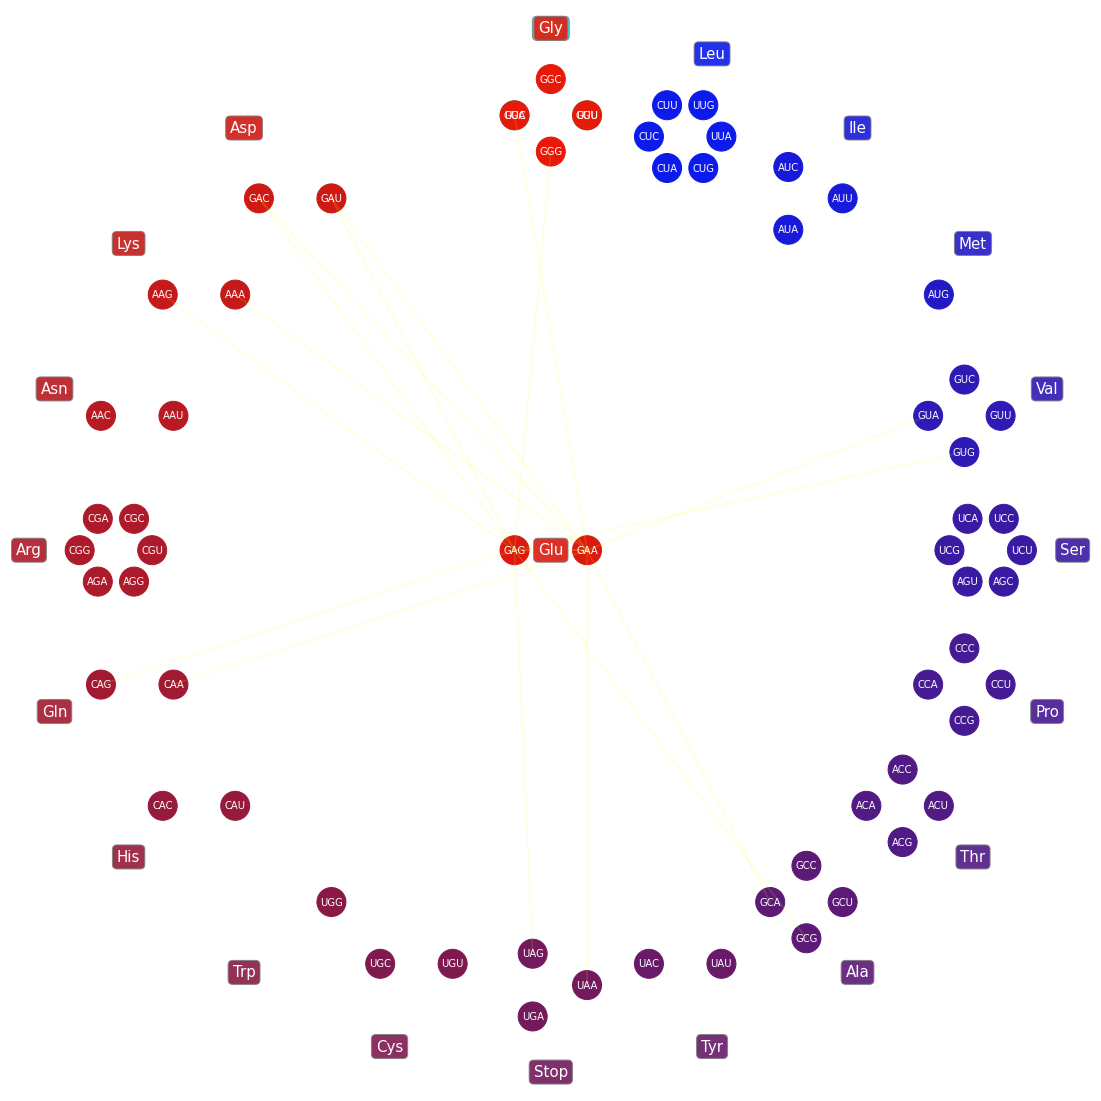

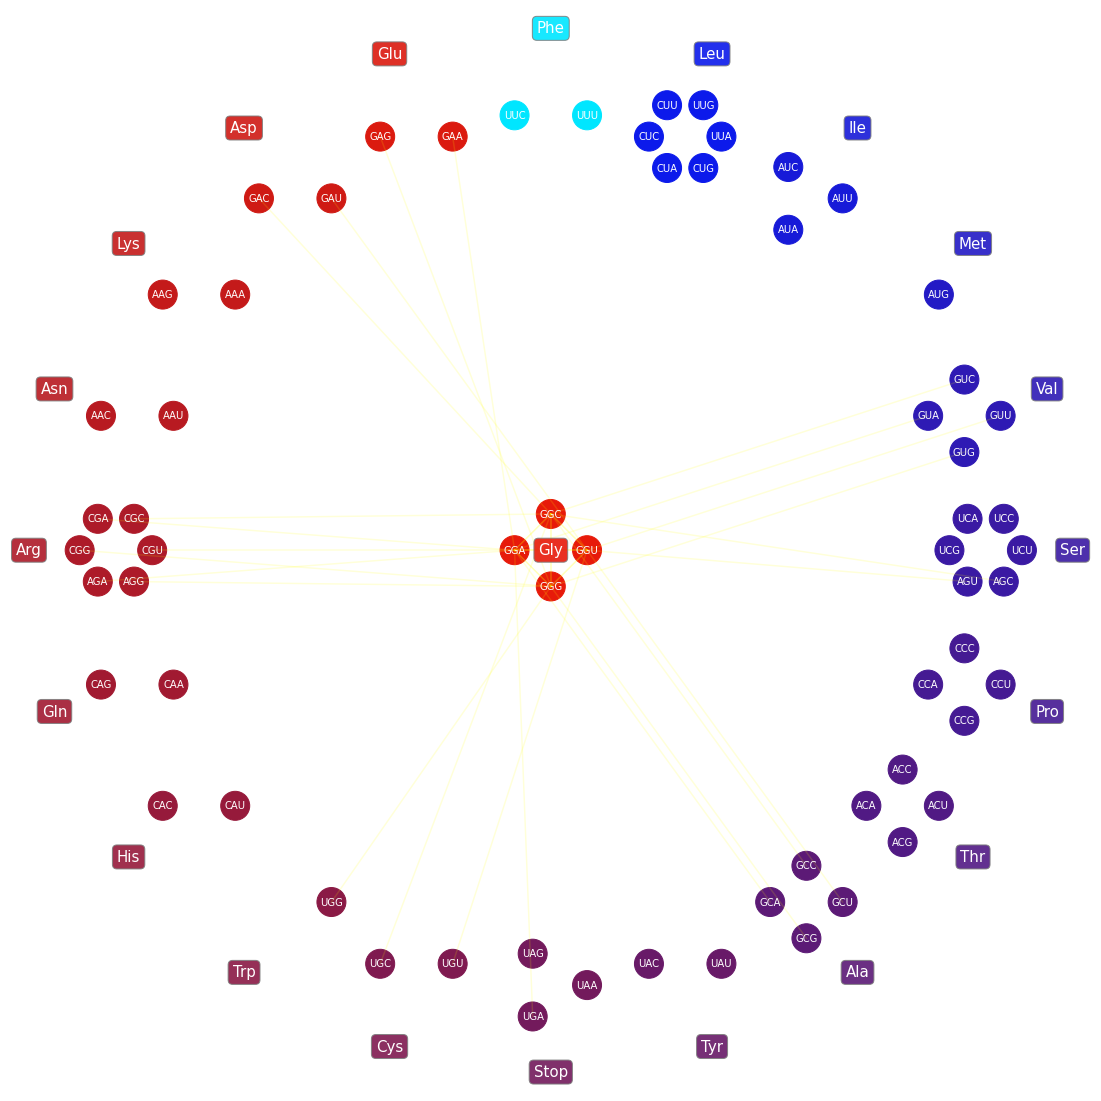

In [16]:
cases = ['full','syno']
plot_nets('full')
plot_nets('syno')
for q in AminoA:
    #print(q)
    plot_nets(q)